In [1]:
import sys
sys.path.append('../../../')

In [2]:
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt

import pickle
import argparse
import time
import itertools
from copy import deepcopy
    
%load_ext autoreload
%autoreload 2

In [3]:
with open('DB1/summaries_5_0/all_results', 'rb') as f:
    all_results_1 = pickle.load(f)
with open('DB3/summaries_5_0/all_results', 'rb') as f:
    all_results_3 = pickle.load(f)

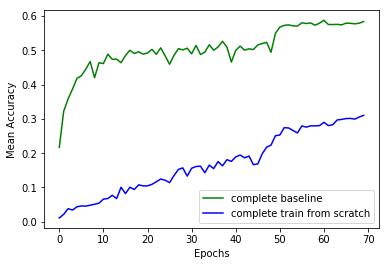

In [10]:
task = 19
for k, v_1 in all_results_1[task].items():
    plt.plot(np.mean(np.array(v_1['val_acc']), axis=0), color='g', label='complete baseline')
    break
for k, v_3 in all_results_3[task].items():
    plt.plot(np.mean(np.array(v_3[0]['val_acc']), axis=0), color='b', label='complete train from scratch')
    break
plt.xlabel('Epochs')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.savefig('complete_baseline_vs_scratch.pdf')

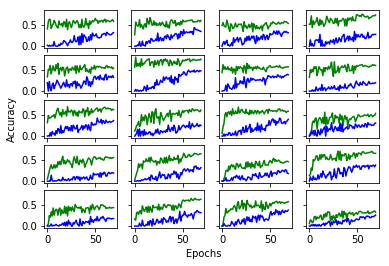

In [12]:
nrows = 5
ncols = 4
f, axarr = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True)
for i in range(nrows):
    for j in range(ncols):
        axarr[i, j].plot(np.array(v_1['val_acc'])[i * ncols + j], color='g')
        axarr[i, j].plot(np.array(v_3[0]['val_acc'])[i * ncols + j], color='b')
        if (j == 0 and i == 2):
            axarr[i, j].set_ylabel('Accuracy')
        if (i == 4 and j == 1):
            axarr[i, j].set_xlabel('                       Epochs')
plt.show()